In [1]:
from data.dataset import BreastCancerDataset
from sklearn.model_selection import StratifiedKFold
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

Split dataset into stratified K-fold

In [2]:
# Load dataset
data_dir = Path("../data/")
dataset = BreastCancerDataset(data_dir, mode="train", num_bags=None)

all_data = [dataset[i]["features"] for i in range(len(dataset))]
all_labels = [dataset[i]["label"] for i in range(len(dataset))]
all_samples = [dataset[i]["sample"] for i in range(len(dataset))]

seed = 0
kfold = StratifiedKFold(5, shuffle=True, random_state=seed)
splits = kfold.split(all_data, all_labels, all_samples)

Plot the distribution of classes and centers per fold

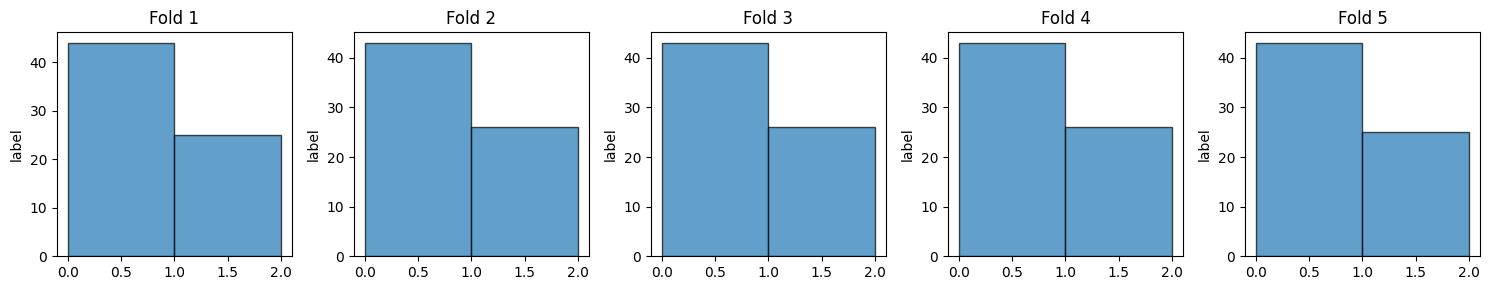

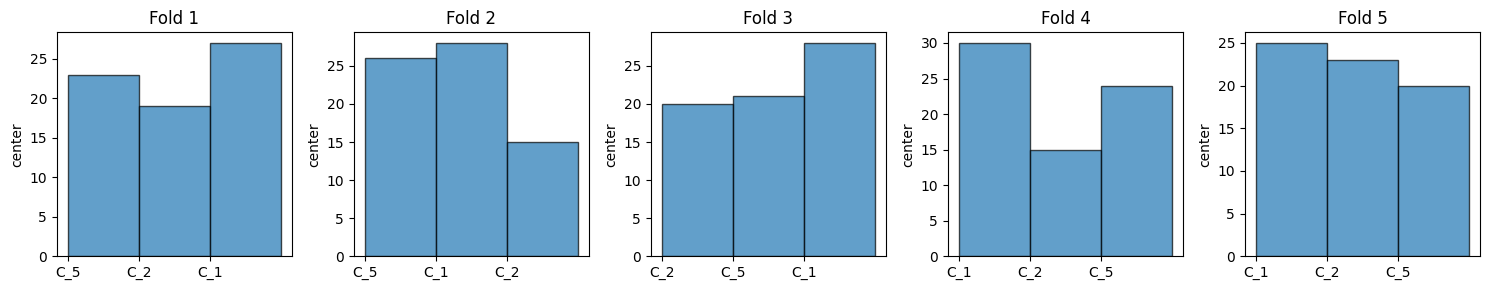

In [3]:
val_idx = {}
for fold, (train, val) in enumerate(splits):
    val_idx[fold] = val

def plot_results(val_dict, key='label'):
    assert key in ['label', 'center'], "Key must be either 'label' or 'center'"
    num_folds = len(val_dict)
    

    # Create subplots
    fig, axes = plt.subplots(1, num_folds, figsize=(15, 3))
    
    # Plotting for Training
    for fold in range(num_folds):

        # get the idx for each fold, and the corresponding labels
        indices = val_dict[fold]
        all_labels = [dataset[i][key] for i in indices]

        # Extract unique labels and sort them for plotting
        unique_labels = np.unique(all_labels)
        bins = list(range(len(unique_labels) + 1))

        # Plot histogram for each fold
        axes[fold].hist(all_labels, bins=bins, edgecolor='black', alpha=0.7)
        axes[fold].set_title("Fold {}".format(fold+1))
        axes[fold].set_ylabel(key)

    plt.tight_layout()
    plt.show()

plot_results(val_idx, key='label')
plot_results(val_idx, key='center')